In [1]:
import pandas as pd
from ETL import ETL
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dataset/flights.csv')

In [57]:
print(df.shape[0])

95763


In [3]:
df = ETL(df)

c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_MON'] = df['FL_DATE'].apply(lambda x: x.month)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'FL_DAY'] = df['FL_DATE'].apply(lambda x: x.day)
c:\Users\dswal\Desktop\Data-Science-Project\ETL.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

## Data Visualization

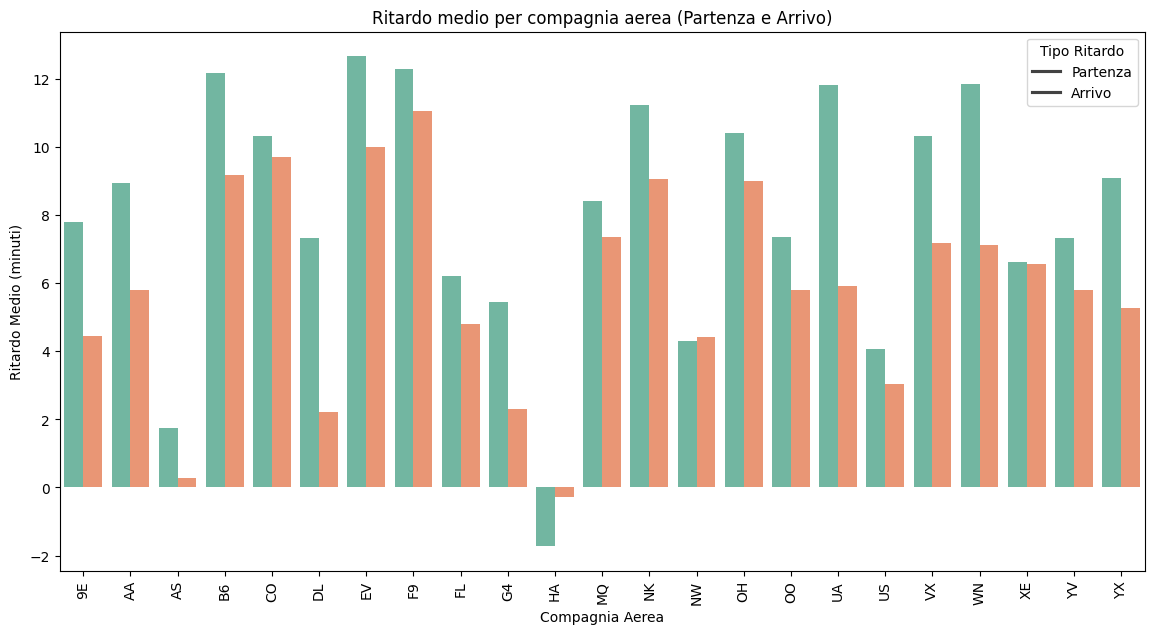

In [47]:
# Calcolo dei ritardi medi per compagnia aerea (sia in partenza che in arrivo)
carrier_delays = df.groupby('OP_CARRIER').agg({
    'DEP_DELAY': 'mean',  # Media dei ritardi di partenza
    'ARR_DELAY': 'mean'   # Media dei ritardi di arrivo
}).reset_index()

# Ristruttura i dati per facilitare la visualizzazione con un grafico a barre raggruppato
carrier_delays_melted = carrier_delays.melt(id_vars='OP_CARRIER', 
                                            value_vars=['DEP_DELAY', 'ARR_DELAY'], 
                                            var_name='Tipo Ritardo', 
                                            value_name='Ritardo Medio')

# Visualizzazione combinata con palette Set2
plt.figure(figsize=(14, 7))
sns.barplot(x='OP_CARRIER', y='Ritardo Medio', hue='Tipo Ritardo', data=carrier_delays_melted, palette='Set2')
plt.title('Ritardo medio per compagnia aerea (Partenza e Arrivo)')
plt.xlabel('Compagnia Aerea')
plt.ylabel('Ritardo Medio (minuti)')
plt.xticks(rotation=90)
plt.legend(title='Tipo Ritardo', labels=['Partenza', 'Arrivo'])
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_10320\3529545556.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  carrier_punctuality = df.groupby(['OP_CARRIER', 'Puntualità']).size().unstack(fill_value=0)


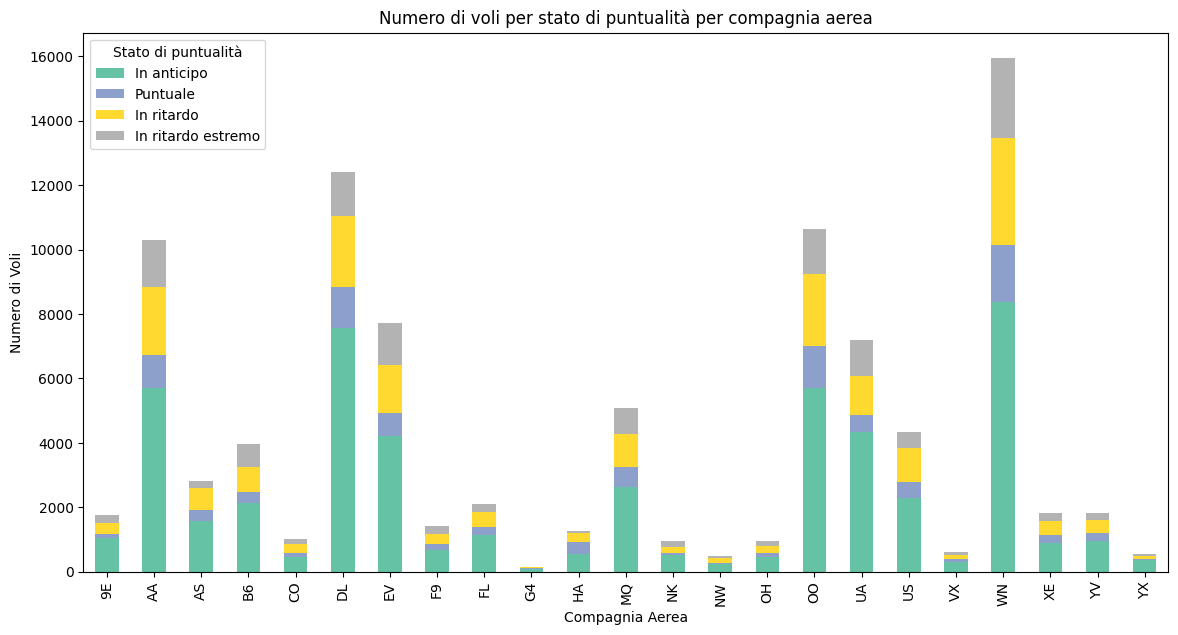

In [48]:
# Definire i voli puntuali, in ritardo e in anticipo
df['Puntualità'] = pd.cut(df['ARR_DELAY'],
                          bins=[-float('inf'), -5, 0, 30, float('inf')],
                          labels=['In anticipo', 'Puntuale', 'In ritardo', 'In ritardo estremo'])

# Raggruppare per compagnia aerea e tipo di puntualità, contando il numero di voli
carrier_punctuality = df.groupby(['OP_CARRIER', 'Puntualità']).size().unstack(fill_value=0)

# Creare un grafico a barre impilate
carrier_punctuality.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

# Impostare il titolo e le etichette
plt.title('Numero di voli per stato di puntualità per compagnia aerea')
plt.xlabel('Compagnia Aerea')
plt.ylabel('Numero di Voli')
plt.xticks(rotation=90)
plt.legend(title='Stato di puntualità', labels=['In anticipo', 'Puntuale', 'In ritardo', 'In ritardo estremo'])
plt.show()


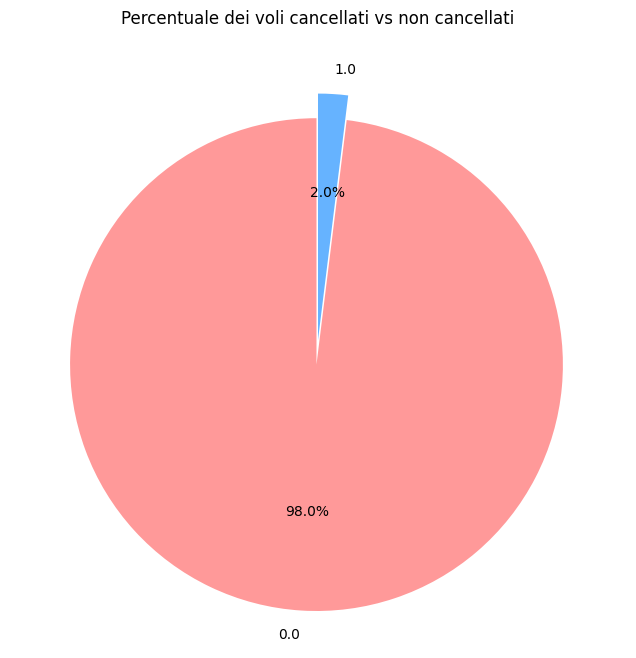

In [49]:
# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLED'].value_counts()

# Crea un grafico a torta con evidenziazione
plt.figure(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff']  # Colori per non cancellati e cancellati
explode = (0.1, 0)  # Metti in evidenza il segmento cancellato con un'esplosione

# Crea il grafico
plt.pie(cancellati, labels=cancellati.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

# Aggiungi un titolo
plt.title('Percentuale dei voli cancellati vs non cancellati')

# Mostra il grafico
plt.show()


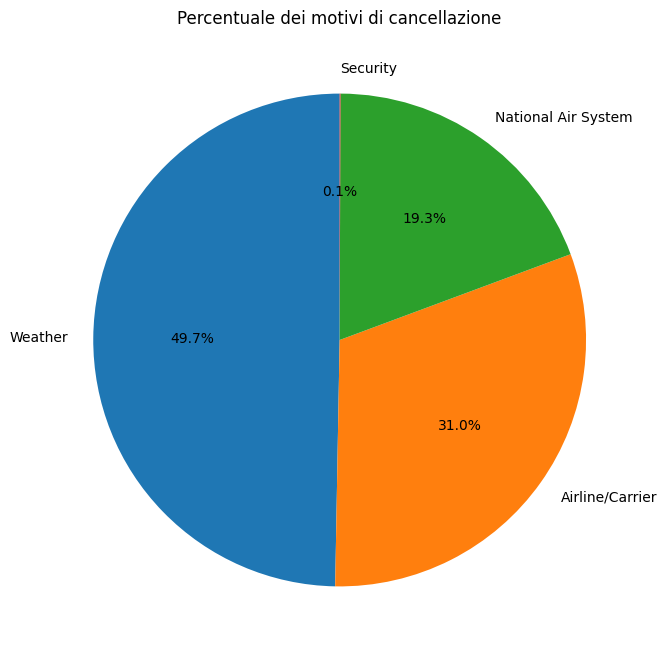

In [50]:
# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLATION_REASON'].value_counts()

# Crea un grafico a torta con evidenziazione
plt.figure(figsize=(8, 8))
explode = (0.1, 0)  # Metti in evidenza il segmento cancellato con un'esplosione

# Crea il grafico
plt.pie(cancellati, labels=cancellati.index, autopct='%1.1f%%', startangle=90)

# Aggiungi un titolo
plt.title('Percentuale dei motivi di cancellazione')

# Mostra il grafico
plt.show()


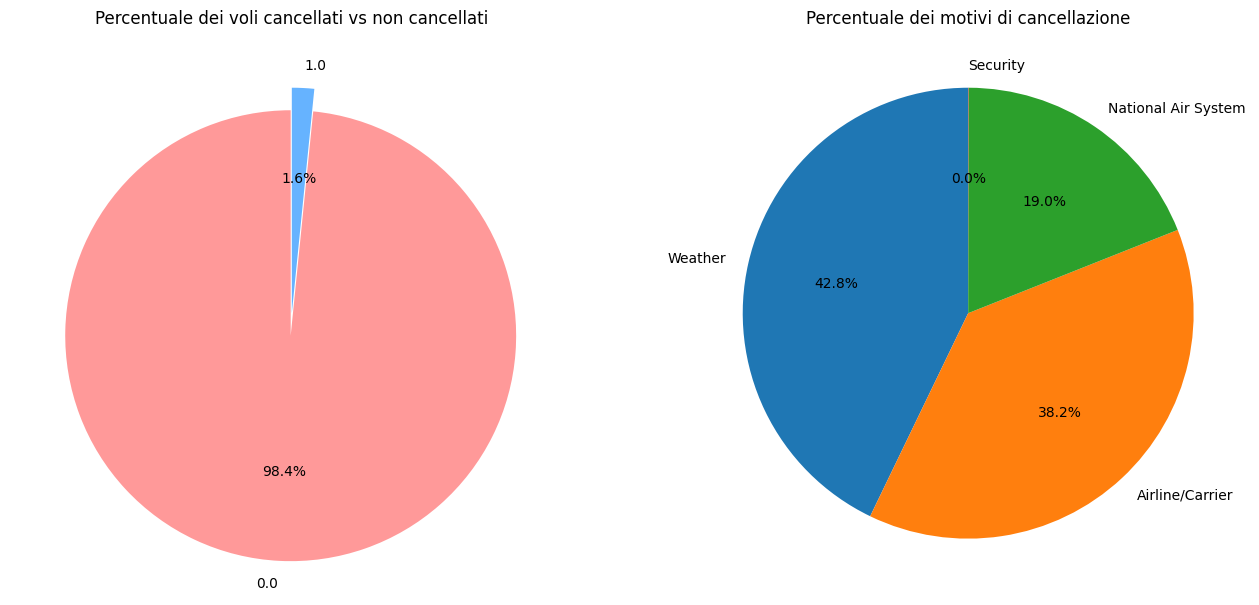

In [ ]:
# Conta i valori unici nella colonna 'CANCELLED' (0 e 1)
cancellati = df['CANCELLED'].value_counts()

# Conta i valori unici nella colonna 'CANCELLATION_REASON'
motivi_cancellazione = df['CANCELLATION_REASON'].value_counts()

# Crea una figura con due sottotrame affiancate
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1 riga, 2 colonne

# Grafico a torta per i voli cancellati vs non cancellati
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # Metti in evidenza il segmento cancellato
ax1.pie(cancellati, labels=cancellati.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
ax1.set_title('Percentuale dei voli cancellati vs non cancellati')

# Grafico a torta per i motivi di cancellazione
ax2.pie(motivi_cancellazione, labels=motivi_cancellazione.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Percentuale dei motivi di cancellazione')

# Mostra il grafico
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_10320\3184558394.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_CARRIER', y='Cancellazioni', data=carrier_cancellations, palette='magma')


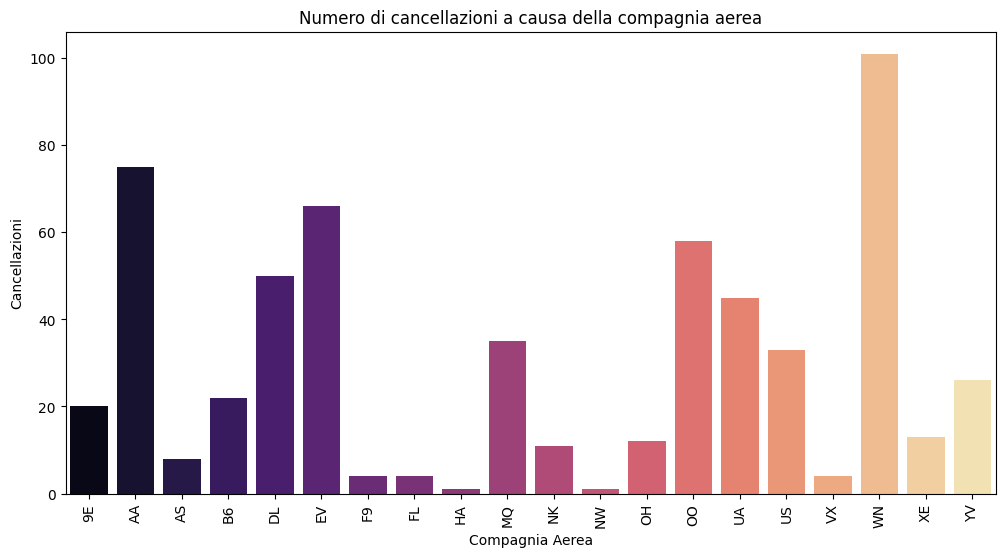

In [51]:
# Calcolo delle cancellazioni per compagnia aerea (a causa della compagnia stessa)
carrier_cancellations = df[df['CANCELLATION_REASON'] == 'Airline/Carrier'].groupby('OP_CARRIER').size().reset_index(name='Cancellazioni')

# Creazione del grafico
plt.figure(figsize=(12, 6))
sns.barplot(x='OP_CARRIER', y='Cancellazioni', data=carrier_cancellations, palette='magma')
plt.title('Numero di cancellazioni a causa della compagnia aerea')
plt.xlabel('Compagnia Aerea')
plt.xticks(rotation=90)
plt.show()


C:\Users\dswal\AppData\Local\Temp\ipykernel_8756\3316163439.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_CARRIER', y='Cancellazioni', data=carrier_cancellations, palette='magma')


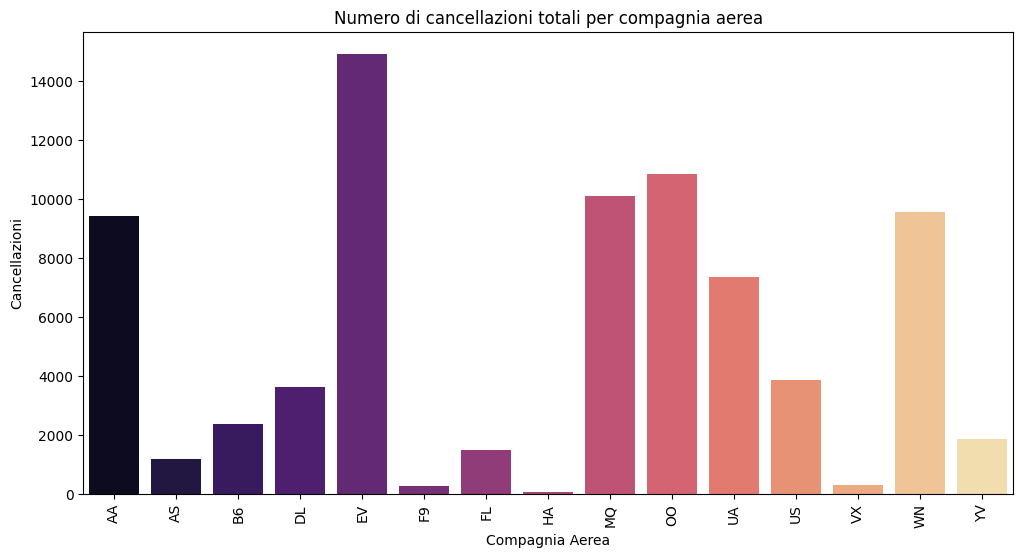

In [16]:
# Calcolo delle cancellazioni per compagnia aerea (a causa della compagnia stessa)
carrier_cancellations = df[df['CANCELLATION_REASON'].notna()].groupby('OP_CARRIER').size().reset_index(name='Cancellazioni')

# Creazione del grafico
plt.figure(figsize=(12, 6))
sns.barplot(x='OP_CARRIER', y='Cancellazioni', data=carrier_cancellations, palette='magma')
plt.title('Numero di cancellazioni totali per compagnia aerea')
plt.xlabel('Compagnia Aerea')
plt.xticks(rotation=90)
plt.show()


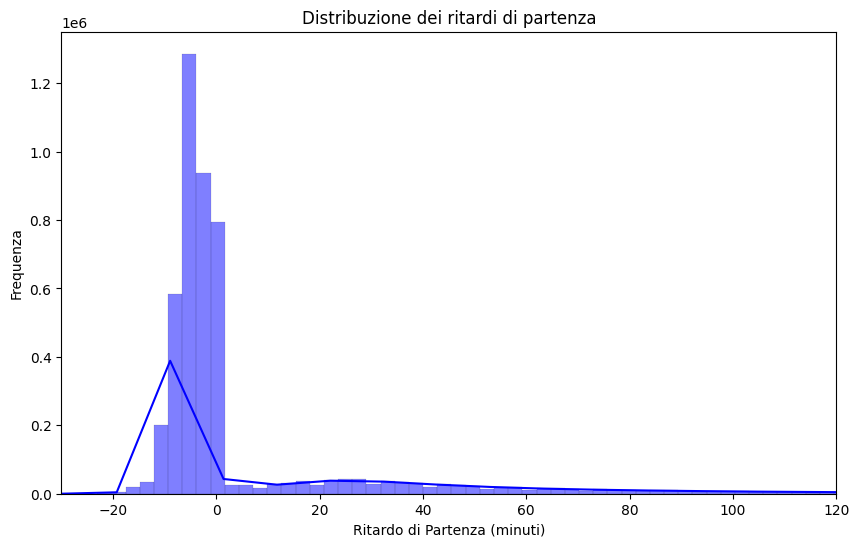

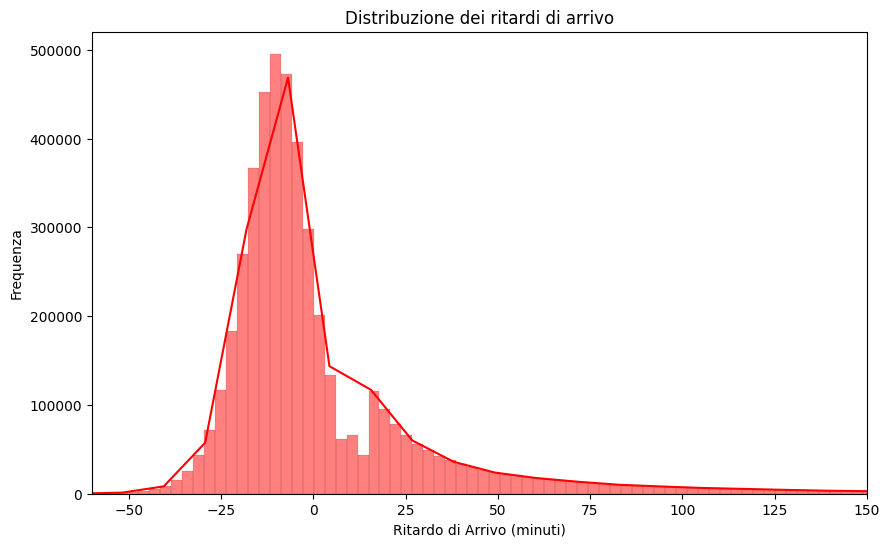

In [22]:
# Distribuzione dei ritardi di partenza
plt.figure(figsize=(10, 6))
sns.histplot(df['DEP_DELAY'], bins=750, kde=True, color='blue', kde_kws={'bw_adjust': 0.3})
plt.title('Distribuzione dei ritardi di partenza')
plt.xlabel('Ritardo di Partenza (minuti)')
plt.ylabel('Frequenza')
plt.xlim(-30, 120)  # Limitare l'asse x per concentrarsi sui valori centrali
plt.show()

# Distribuzione dei ritardi di arrivo
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY'], bins=750, kde=True, color='red', kde_kws={'bw_adjust': 0.3})
plt.title('Distribuzione dei ritardi di arrivo')
plt.xlabel('Ritardo di Arrivo (minuti)')
plt.ylabel('Frequenza')
plt.xlim(-60, 150)  # Limitare l'asse x per concentrarsi sui valori centrali
plt.show()


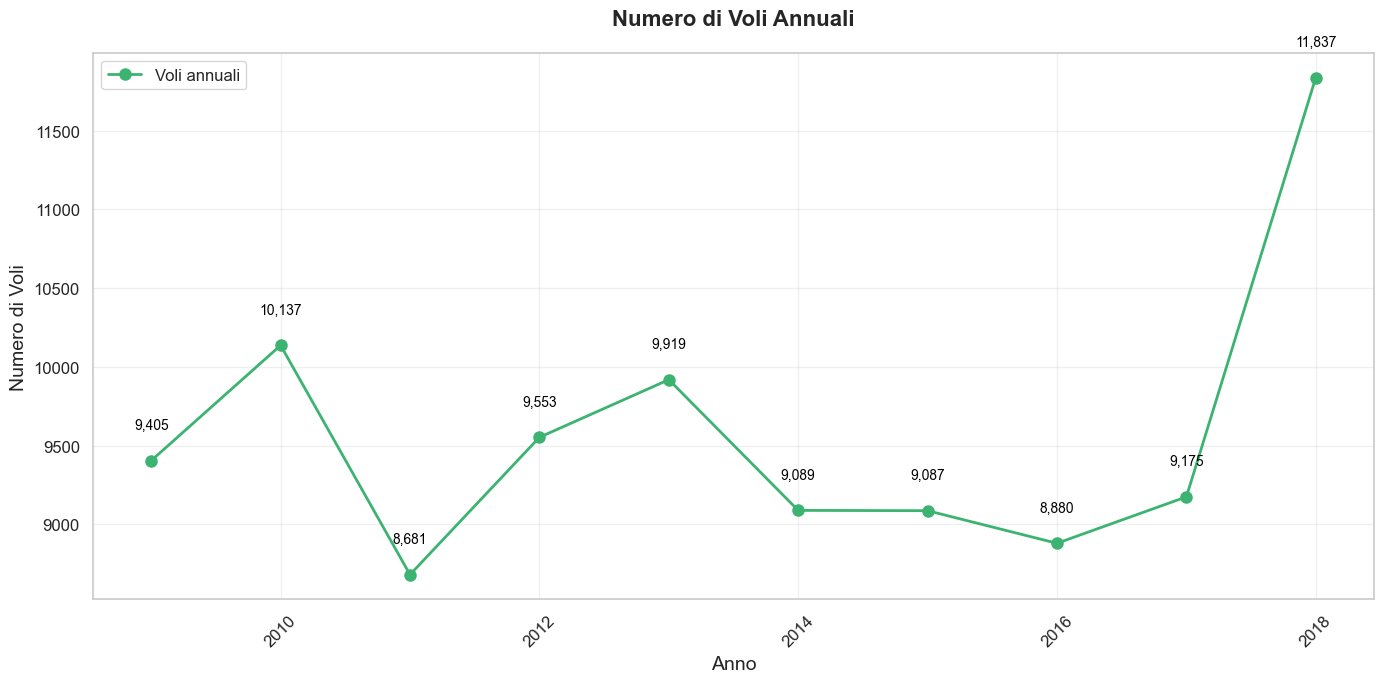

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcolo dei voli annuali
voli_anni = df.groupby('FL_YEAR').size().reset_index(name='Voli')

# Impostazione dello stile del grafico
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 7))

# Creazione del grafico a linee
plt.plot(
    voli_anni['FL_YEAR'], 
    voli_anni['Voli'], 
    marker='o', 
    color='mediumseagreen', 
    linewidth=2, 
    markersize=8,
    label='Voli annuali'
)

# Aggiunta di annotazioni sui marker
for x, y in zip(voli_anni['FL_YEAR'], voli_anni['Voli']):
    plt.text(x, y + 200, f"{y:,}", ha='center', fontsize=10, color='black')

# Personalizzazione del grafico
plt.title('Numero di Voli Annuali', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Anno', fontsize=14)
plt.ylabel('Numero di Voli', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()

# Mostrare il grafico
plt.show()


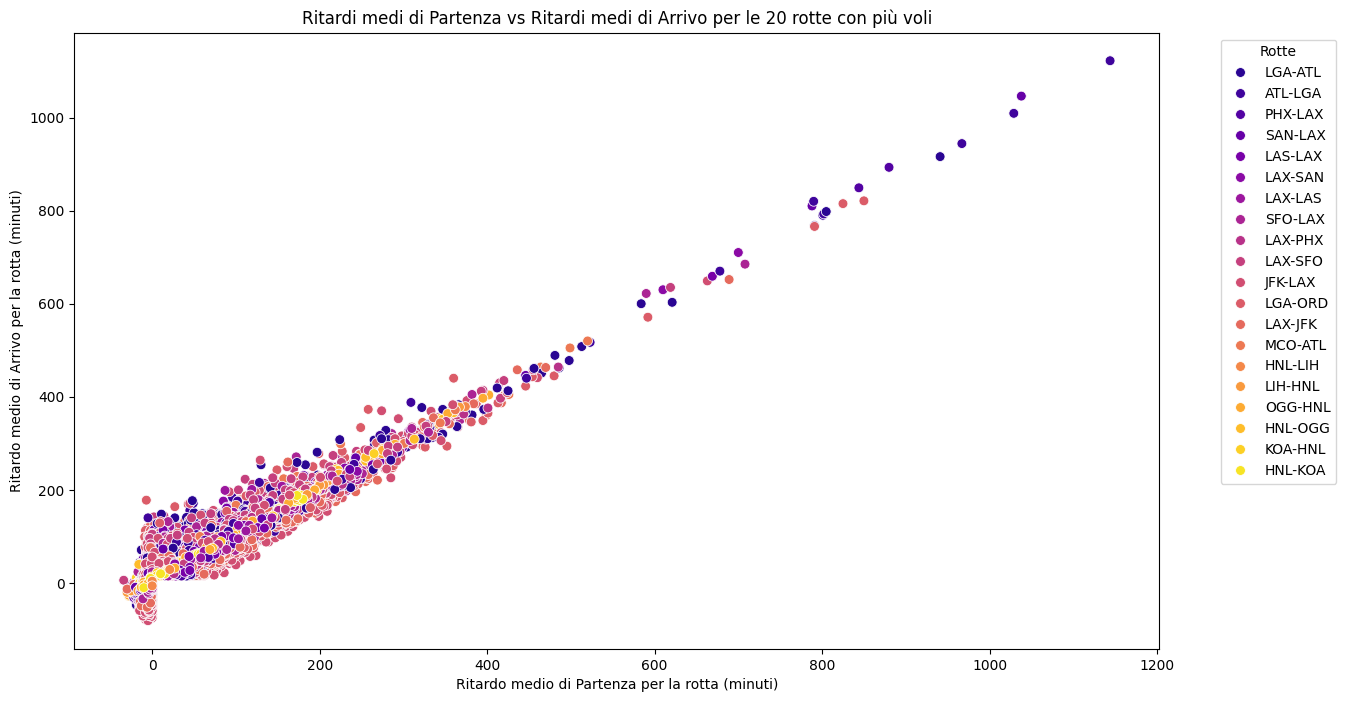

In [ ]:
# Calcolo delle rotte tra aeroporti con conteggio dei voli
airport_routes = df.groupby(['ORIGIN', 'DEST']).size().reset_index(name='num_flights')

# Seleziona le prime 20 rotte con più voli
top_airports_routes_by_flights = airport_routes.nlargest(20, 'num_flights')

# Filtra i dati originali per ottenere solo i voli delle prime 20 rotte
airport_delays_routes_top = df.merge(top_airports_routes_by_flights, on=['ORIGIN', 'DEST'])

# Crea una nuova colonna per combinare ORIGIN e DEST in un unico identificatore di rotta
airport_delays_routes_top['route'] = airport_delays_routes_top['ORIGIN'] + '-' + airport_delays_routes_top['DEST']

# Visualizzazione dei ritardi di partenza vs ritardi di arrivo per le prime 20 rotte
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DEP_DELAY', y='ARR_DELAY', data=airport_delays_routes_top, hue='route', palette='plasma', s=50)
plt.title('Ritardi di Partenza vs Ritardi di Arrivo per le 20 rotte con più voli')
plt.xlabel('Ritardo di Partenza per il volo della rotta (minuti)')
plt.ylabel('Ritardo di Arrivo per il volo della rotta (minuti)')
plt.legend(title='Rotte', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()